
# Image Classification with CNN


Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

------------

## Task

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt    
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)

In [10]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

## The Data

**Download the fashion mnist dataset using Keras.**

In [90]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [91]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [92]:
X_train.shape


(60000, 28, 28)

In [93]:
y_train.shape

(60000,)

In [94]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

## Visualizing the Data

**Using matplotlib show an any image from the data set.**

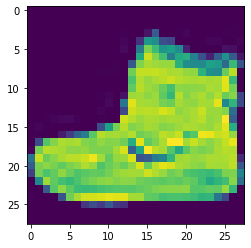

In [95]:
plt.imshow(X_train[0])

In [96]:
y_train[0]

9

In [97]:
classes[9]

'Ankle boot'

## Preprocessing the Data

**Normalize the X train and X test using max value of the image arrays.**

In [98]:
X_train.max()

255

In [99]:
X_train = X_train/255

In [100]:
X_test = X_test/255

**Reshape the X into 4 dimension**

In [101]:
X_train.shape

(60000, 28, 28)

In [102]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)

In [103]:
X_test = X_test.reshape(10000,28,28,1)

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis.**

In [104]:
from tensorflow.keras.utils import to_categorical

In [105]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [106]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

## Building the Model

**Create the model**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [108]:
model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1, 1)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

###  Model Training 

**Train the model with arbitrary amount of epochs.**

In [109]:
from tensorflow.keras.callbacks import EarlyStopping

In [110]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 134s 71ms/step - loss: 0.4204 - accuracy: 0.8555 - val_loss: 0.3153 - val_accuracy: 0.8886
Epoch 2/10
1875/1875 [==============================] - 132s 70ms/step - loss: 0.3050 - accuracy: 0.8948 - val_loss: 0.3101 - val_accuracy: 0.8918
Epoch 3/10
1875/1875 [==============================] - 132s 70ms/step - loss: 0.2898 - accuracy: 0.8999 - val_loss: 0.3194 - val_accuracy: 0.8965
Epoch 4/10
1875/1875 [==============================] - 132s 70ms/step - loss: 0.2829 - accuracy: 0.9033 - val_loss: 0.3051 - val_accuracy: 0.8920
Epoch 5/10
1875/1875 [==============================] - 134s 71ms/step - loss: 0.2796 - accuracy: 0.9048 - val_loss: 0.3204 - val_accuracy: 0.8905
Epoch 6/10
1875/1875 [==============================] - 135s 72ms/step - loss: 0.2793 - accuracy: 0.9061 - val_loss: 0.3377 - val_accuracy: 0.8882
Epoch 7/10
1875/1875 [==============================] - 135s 72ms/step - loss: 0.2782 - accuracy: 0.9064 - val_loss: 0

**Plot values of metrics you used in your model.**

In [111]:
summary= pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.420357,0.855533,0.315297,0.8886
1,0.304955,0.894767,0.310071,0.8918
2,0.289810,0.899867,0.319353,0.8965
3,0.282886,0.903283,0.305135,0.8920
4,0.279585,0.904783,0.320372,0.8905


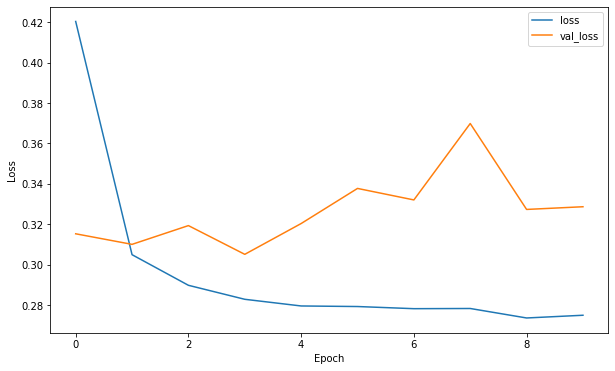

In [112]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

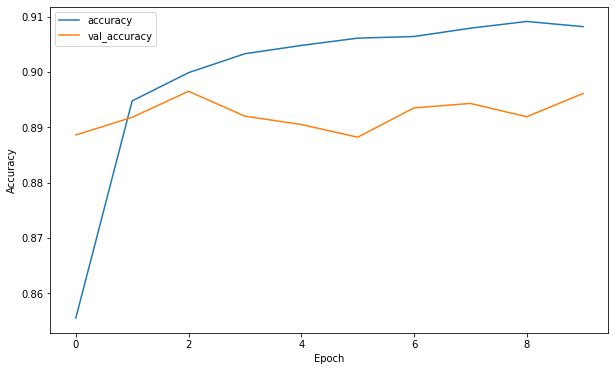

In [113]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

**Train the model using earlystop.**

In [114]:
from tensorflow.keras.callbacks import EarlyStopping

In [115]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [116]:
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 133s 71ms/step - loss: 0.2778 - accuracy: 0.9087 - val_loss: 0.3465 - val_accuracy: 0.8973
Epoch 2/10
1875/1875 [==============================] - 133s 71ms/step - loss: 0.2761 - accuracy: 0.9095 - val_loss: 0.3677 - val_accuracy: 0.8930
Epoch 3/10
1875/1875 [==============================] - 134s 71ms/step - loss: 0.2724 - accuracy: 0.9095 - val_loss: 0.3451 - val_accuracy: 0.8915
Epoch 4/10
1875/1875 [==============================] - 132s 71ms/step - loss: 0.2706 - accuracy: 0.9115 - val_loss: 0.3638 - val_accuracy: 0.8918
Epoch 5/10
1875/1875 [==============================] - 132s 71ms/step - loss: 0.2711 - accuracy: 0.9100 - val_loss: 0.3287 - val_accuracy: 0.8928
Epoch 6/10
1875/1875 [==============================] - 136s 72ms/step - loss: 0.2737 - accuracy: 0.9094 - val_loss: 0.3238 - val_accuracy: 0.8938
Epoch 7/10
1875/1875 [==============================] - 132s 71ms/step - loss: 0.2740 - accuracy: 0.9102 - val_loss: 0

In [ ]:
# bu kdarını bile 22 dk da tamamladı earlystop devreye girmesi için belki 25 epoch vermek gerekirdi ama göze alamadım

**Plot values of metrics you used in your model.**

In [117]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.277775,0.908700,0.346453,0.8973
1,0.276118,0.909483,0.367666,0.8930
2,0.272367,0.909533,0.345081,0.8915
3,0.270573,0.911483,0.363824,0.8918
4,0.271095,0.910050,0.328710,0.8928


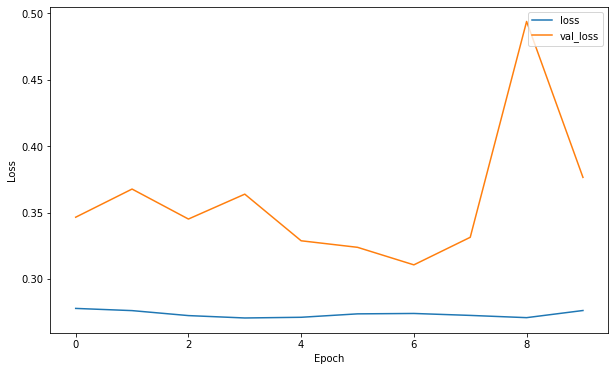

In [118]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

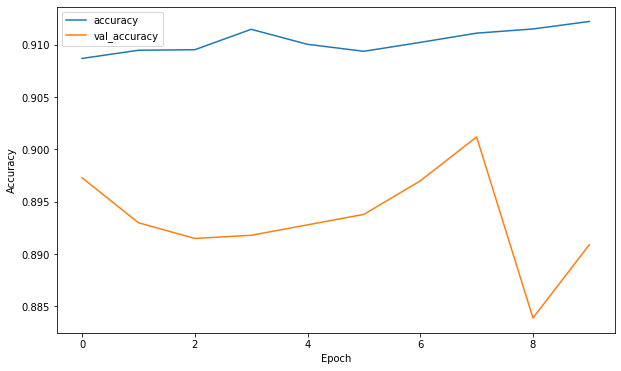

In [119]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

### Model Evaluation

**Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set.**

In [120]:
model.metrics_names

['loss', 'accuracy']

In [121]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 5s 17ms/step - loss: 0.3765 - accuracy: 0.8909


[0.37645024061203003, 0.8909000158309937]

In [122]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [123]:
preds = model.predict(X_test)
predictions = np.argmax(y_test, axis=1)

In [126]:
y_test_arg=np.argmax(y_test,axis=1)
y_pred = np.argmax(preds,axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, y_pred))

Confusion Matrix
[[787   0  15  37   5   1 150   0   5   0]
 [  0 944   6  33   5   0  10   0   2   0]
 [ 10   0 822  13  82   0  71   0   2   0]
 [  5   8   8 931  15   0  33   0   0   0]
 [  0   0  63  36 837   0  64   0   0   0]
 [  0   1   0   0   0 956   0  36   0   7]
 [ 74   0  69  43  67   0 737   0  10   0]
 [  0   0   0   0   0   5   0 985   0  10]
 [  1   1   1   7   1   1  15   5 968   0]
 [  0   0   1   0   0   7   1  49   0 942]]


In [127]:
print(classification_report(y_test_arg, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1000
           1       0.99      0.94      0.97      1000
           2       0.83      0.82      0.83      1000
           3       0.85      0.93      0.89      1000
           4       0.83      0.84      0.83      1000
           5       0.99      0.96      0.97      1000
           6       0.68      0.74      0.71      1000
           7       0.92      0.98      0.95      1000
           8       0.98      0.97      0.97      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



# Prediction

In [146]:
my_number = X_test[5]

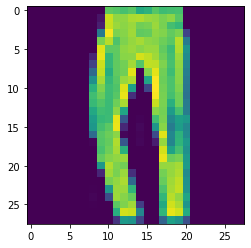

In [147]:
plt.imshow(my_number.reshape(28,28))

In [149]:
model.predict(my_number.reshape(1,28,28,1))

array([[5.5311283e-04, 9.9819249e-01, 5.4930331e-04, 9.2890063e-05,
        2.1635293e-04, 9.0404640e-08, 3.8209563e-04, 1.2355129e-07,
        1.3469751e-05, 3.2134519e-08]], dtype=float32)

In [150]:
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)

array([1])

# End of Assignment

In [ ]:
model.save("image_classification.h5")